# Prototype Checked Items for Checklist1

In [1]:
from PIL import Image
import cv2
import imbo
import numpy as np

In [2]:
image_path = "images"
blank_image_path = "/Checklist1.jpg"
aligned_path = "/aligned"
this_image_path = "/Checklist1 9.jpg"


#open image
blank_img = cv2.imread(image_path + blank_image_path, cv2.IMREAD_GRAYSCALE)
bgr_blank_img = cv2.cvtColor(blank_img,cv2.COLOR_GRAY2BGR) 


#convert image to black and white
threshold = 200
blank_img_bw = cv2.threshold(blank_img, threshold, 255, cv2.THRESH_BINARY)[1]

In [20]:
checkbox_dict = {"Risk":
                 {"x": 106, "y": 492,"width": 204,"height": 308},
                 "Symptoms":
                 {"x": 106, "y": 772, "width": 208, "height": 180},
                 "Safety":
                 {"x": 106, "y": 920, "width": 208, "height": 164},
                 "Breathing":
                 {"x": 106, "y": 1054, "width": 208, "height": 276},
                 "Naloxon":
                 {"x": 106, "y": 1292, "width": 208, "height": 396},
                 "Call911":
                 {"x": 106, "y": 1656, "width": 208, "height": 312},
                 "Consent":
                 {"x": 484, "y": 1928, "width": 2000, "height": 248},
                 "Signature":
                 {"x": 512, "y": 2292, "width": 750, "height": 144},
                 "Trained_SHP":
                 {"x": 264, "y": 2926, "width": 38, "height": 38},
                 "Trained_SEP":
                 {"x": 438, "y": 2926, "width": 38, "height": 38},
                 "Trained_CM":
                 {"x": 608, "y": 2926, "width": 38, "height": 38},
                 "Trained_WN":
                 {"x": 782, "y": 2926, "width": 38, "height": 38},
                 "Trained_WCC":
                 {"x": 960, "y": 2926, "width": 38, "height": 38},
                 "Trained_DropIn":
                 {"x": 1164, "y": 2926, "width": 38, "height": 38},
                 "Trained_Testing":
                 {"x": 1402, "y": 2926, "width": 38, "height": 38},
                 "Trained_External":
                 {"x": 1648, "y": 2926, "width": 38, "height": 38},
                 "Medical_SHP":
                 {"x": 264, "y": 3020, "width": 38, "height": 38},
                 "Medical_SEP":
                 {"x": 438, "y": 3020, "width": 38, "height": 38},
                 "Medical_CM":
                 {"x": 608, "y": 3020, "width": 38, "height": 38},
                 "Medical_WN":
                 {"x": 782, "y": 3020, "width": 38, "height": 38},
                 "Medical_WCC":
                 {"x": 960, "y": 3020, "width": 38, "height": 38},
                 "Medical_DropIn":
                 {"x": 1164, "y": 3020, "width": 38, "height": 38},
                 "Medical_Testing":
                 {"x": 1402, "y": 3020, "width": 38, "height": 38},
                 "Medical_External":
                 {"x": 1648, "y": 3020, "width": 38, "height": 38},
                }

In [21]:
for checkbox in checkbox_dict.keys():
    y_0 = checkbox_dict[checkbox]["y"]
    y_1 = checkbox_dict[checkbox]["y"] + checkbox_dict[checkbox]["height"]
    x_0 = checkbox_dict[checkbox]["x"]
    x_1 = checkbox_dict[checkbox]["x"] + checkbox_dict[checkbox]["width"]

    img_cropped = blank_img_bw[y_0:y_1, x_0: x_1]
    checkbox_dict[checkbox]["num_white"] = (img_cropped == 255.0).sum()
    blank_with_bounding = imbo.draw(bgr_blank_img, x_0, y_0, x_1,y_1, checkbox)


In [23]:
img = cv2.imread(image_path + aligned_path + this_image_path, cv2.IMREAD_GRAYSCALE)
#convert image to black and white
img_bw = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1]
bgr_img = cv2.cvtColor(img_bw,cv2.COLOR_GRAY2BGR) 
store_values = {}
for checkbox in checkbox_dict.keys():
    store_values[checkbox] = {}
    y_0 = checkbox_dict[checkbox]["y"]
    y_1 = checkbox_dict[checkbox]["y"] + checkbox_dict[checkbox]["height"]
    x_0 = checkbox_dict[checkbox]["x"]
    x_1 = checkbox_dict[checkbox]["x"] + checkbox_dict[checkbox]["width"]
    
    image = imbo.draw(bgr_img, x_0, y_0, x_1,y_1, checkbox)
    
    box_cropped = img_bw[y_0:y_1,x_0:x_1]
    store_values[checkbox]["num_white"] = (box_cropped == 255.0).sum()
    store_values[checkbox]["diff"] = checkbox_dict[checkbox]["num_white"] - store_values[checkbox]["num_white"]
    store_values[checkbox]["value"] = (store_values[checkbox]["diff"] > 1000)

In [22]:
del image

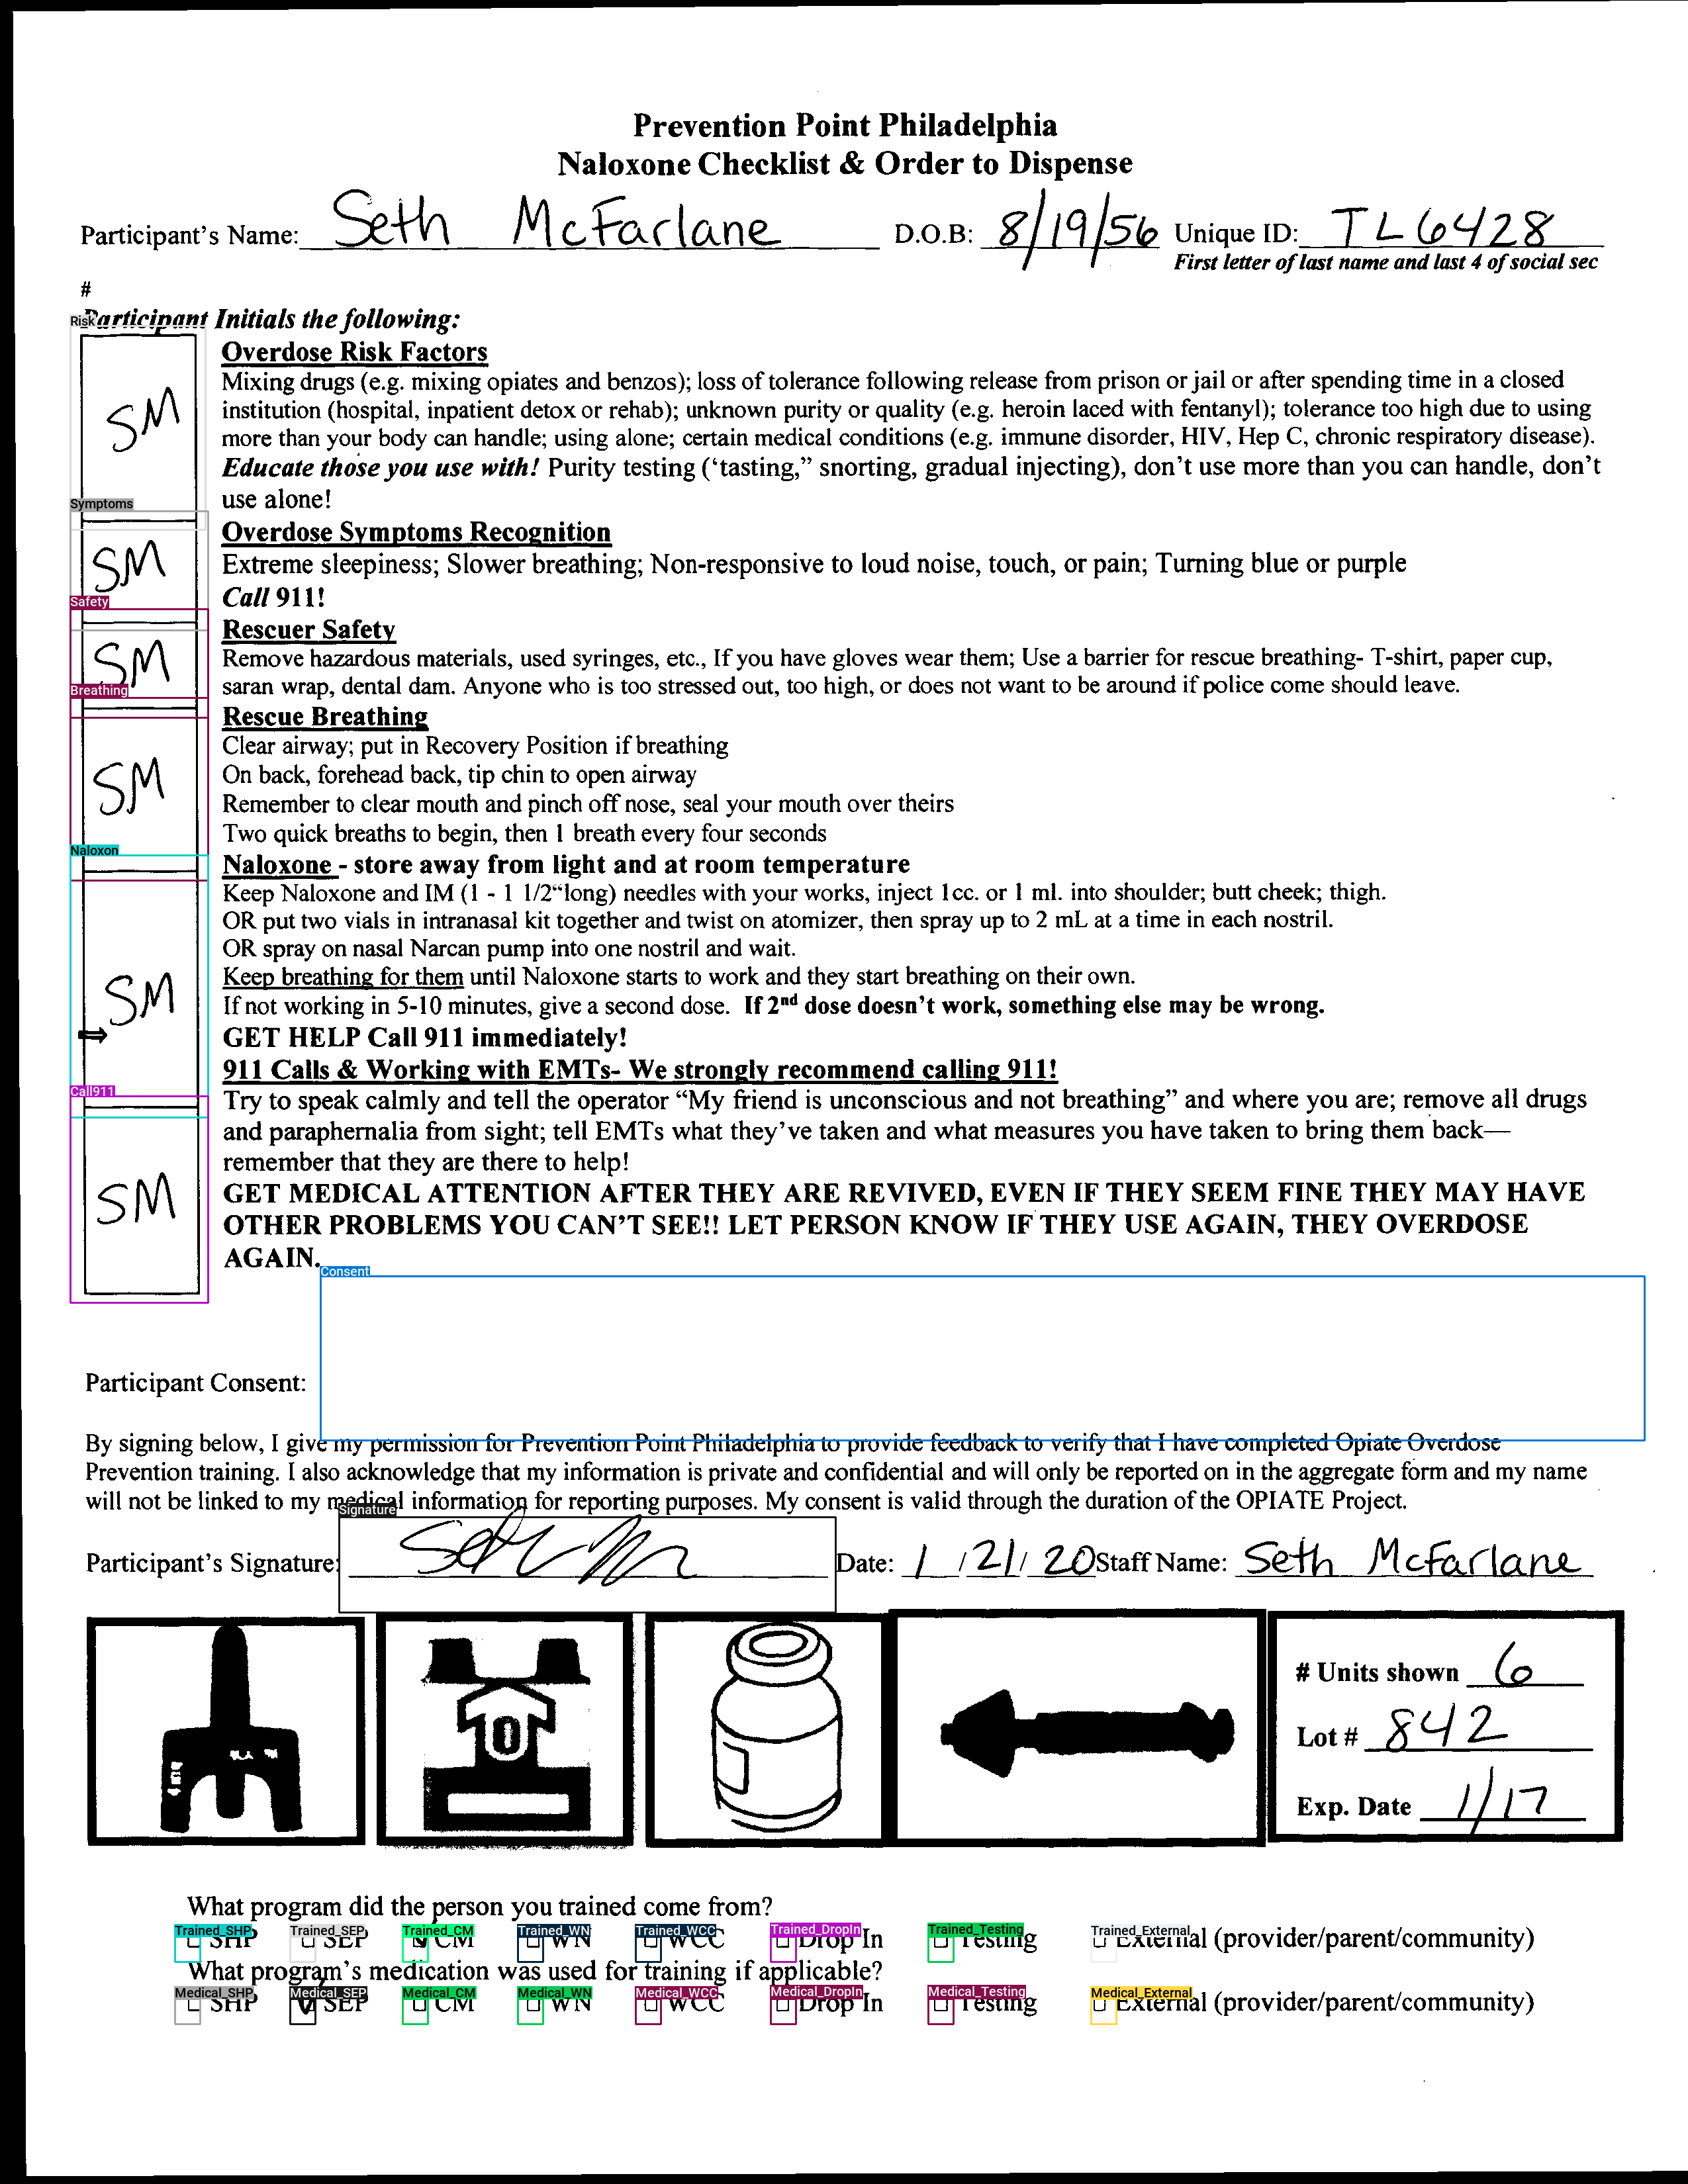

In [24]:
Image.fromarray(image)